In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Admission dataset from kaggle
# task predict whether a student is admitted to a university or not.
'''
check for dependent variables
handle missing values
convert dataset into x and y
finally show prediction using visualization.
'''

In [7]:
df = pd.read_csv('student_admission_dataset.csv')
df.head(10)

,GPA,SAT_Score,Extracurricular_Activities,Admission_Status
0,3.46,1223,8,Rejected
1,2.54,974,8,Rejected
2,2.91,909,9,Rejected
3,2.83,1369,5,Accepted
4,3.60,1536,7,Accepted
5,3.52,1476,9,Accepted
6,3.84,1002,8,Rejected
7,2.63,975,6,Waitlisted
8,3.13,1450,8,Waitlisted
9,2.54,1118,7,Rejected


In [8]:
x = df.iloc[:,0:3]
x

,GPA,SAT_Score,Extracurricular_Activities
0,3.46,1223,8
1,2.54,974,8
2,2.91,909,9
3,2.83,1369,5
4,3.60,1536,7
...,...,...,...
245,3.57,1024,3
246,2.86,1367,1
247,3.09,1036,3
248,3.51,1375,5


In [9]:
y = df.iloc[:,-1]
y

0        Rejected
1        Rejected
2        Rejected
3        Accepted
4        Accepted
          ...    
245      Rejected
246    Waitlisted
247    Waitlisted
248    Waitlisted
249    Waitlisted
Name: Admission_Status, Length: 250, dtype: object

In [10]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([1, 1, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 2, 0, 0, 2, 0, 2, 0, 2, 0,
       1, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 2, 1, 1,
       1, 0, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 0, 0, 2, 1, 2, 1, 2, 0, 1,
       0, 2, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2,
       2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 0, 2, 1, 2, 1, 2, 0, 0,
       0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 0, 2,
       2, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 2, 1, 2, 1, 2, 0, 0, 2, 1, 0, 2, 2,
       1, 2, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 0, 2,
       1, 2, 1, 1, 2, 2, 2, 2])

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,stratify=y, random_state=42) 

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled

array([[-0.356382  , -1.16992173,  0.28697933],
       [-0.88950629, -0.13532695,  1.62176689],
       [ 0.24628024,  1.06031324, -1.04780824],
       [-0.356382  , -0.89663254,  0.95437311],
       [-0.07823019, -0.16460793,  0.95437311],
       [ 1.61385994,  1.19695784, -1.04780824],
       [-1.14447878, -0.31101285, -0.71411135],
       [-0.95904424, -0.45741778, -0.38041445],
       [ 0.36217683,  0.45029274,  0.28697933],
       [-1.32991331,  0.73822242,  0.28697933],
       [ 1.12709429,  1.0115116 , -0.71411135],
       [ 1.12709429, -0.9161532 ,  0.62067622],
       [-0.4954579 ,  1.03591242, -0.04671756],
       [-1.26037536, -1.67745879,  0.95437311],
       [ 1.54432199,  0.97735045, -0.38041445],
       [ 0.13038366, -1.45297124, -0.38041445],
       [-1.46898921,  0.57229684, -1.38150513],
       [ 0.26945956,  0.08428043,  1.28807   ],
       [-0.2173061 ,  0.44541257, -0.71411135],
       [ 0.08402502,  1.09447439, -1.04780824],
       [-0.86632697,  1.57273047,  0.954

In [35]:
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model.fit(x_train_scaled, y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [36]:
y_pred = model.predict(x_test_scaled)

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.42
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.25      0.27        16
           1       0.50      0.56      0.53        16
           2       0.44      0.44      0.44        18

    accuracy                           0.42        50
   macro avg       0.41      0.42      0.41        50
weighted avg       0.41      0.42      0.41        50

[[4 3 9]
 [6 9 1]
 [4 6 8]]


In [29]:
classifier_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
classifier_knn.fit(x_train_scaled, y_train)
y_pred1 = model.predict(x_test_scaled)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

Accuracy: 0.42
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.25      0.27        16
           1       0.50      0.56      0.53        16
           2       0.44      0.44      0.44        18

    accuracy                           0.42        50
   macro avg       0.41      0.42      0.41        50
weighted avg       0.41      0.42      0.41        50

[[4 3 9]
 [6 9 1]
 [4 6 8]]


In [31]:
df['Admission_Status'].value_counts(normalize=True)


Admission_Status
Waitlisted    0.352
Rejected      0.324
Accepted      0.324
Name: proportion, dtype: float64

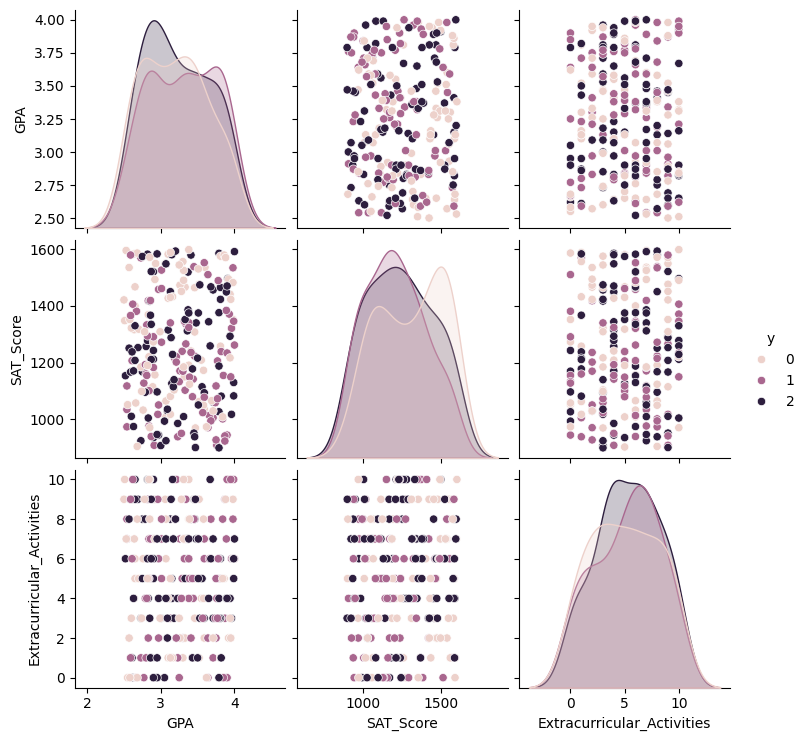

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
df['y'] = y  # Temporarily add encoded label
sns.pairplot(df, hue='y', vars=['GPA', 'SAT_Score', 'Extracurricular_Activities'])
plt.show()
